# project index



## 1. Data origins 

1. the data is about Airbnb  <br>
 online marketplace focused on short-term homestays and experiences. The company acts as a broker and charges a commission from each booking
2. data was downloaded from Kaggle at this [link](https://www.kaggle.com/datasets/whenamancodes/london-uk-airbnb-open-data)

## 2. importing the desired libraries


In [3]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.cm import ScalarMappable
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
from IPython.display import Image  # for displaying images inside jupyter


## 3. creating function that we will use through our analysis

this step will consist of 3 functions to be created

#### 1. a function that returns a data frame of the desired range

In [58]:
def cond_(df, val): # to return a df of the desired range
    if val == 125 :
         return df[df['unit_mean_price'] >= 125]
    else:
        return df[(df['unit_mean_price'] >= val) &  (df['unit_mean_price'] < val+25)]

#### 2. function to create a new column in a data frame

In [5]:
def create_category(row_val):
    if row_val >= 50 and row_val < 75:
        val = '[50: 75]'
    elif row_val >= 75 and row_val < 100:
        val = '[75: 100]'
    elif row_val >= 100 and row_val < 125:
        val = '[100: 125]'
    elif row_val >= 125:
        val = '125<'
    elif row_val > 200:
        val = '> 200'
    else:
        val = '< 100'
    return val # for creating a new column with multiple values based on criteria

#### 3. function to plot horizontal bars with 

In [107]:
# this func is used for plotting a coloured bar plot (the colour is correspondent to the third var)
def plot_hbar(df, x_col, y_col, ax, size= False, title= False, xlabel=False, ylabel=False, sort_=False):
    
    
    if size: plt.figure(figsize=size) # to change  the size if a spacific size is given 
    
    if sort_ : df = df.sort_values(by=[y_col]) # to sort based on the numerical column
    
    
    if x_col == 'index': 
        x_col = df.index    # to make the x axis the index of the df
    else:
        x_col = df[x_col]   # to make the x axis a chosen column
        
        
    ax.barh(x_col, df[y_col])
    
    if title : ax.set_title(title, fontsize= 20)
    if xlabel : ax.xlabel(xlabel, labelpad= 20)
    if ylabel : ax.ylabel(plt_ylabel, fontsize= 18)

## 4. scoping through the data

In [7]:
df = pd.read_csv("D:\programing\data sets\London UK Airbnb Open Data\listingss.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

## 5. data preprocessing (cleaning)

data cleaning consists of 6 steps 

#### 1. dealing with null values

here we will get the number of missing values if existed in each column


In [9]:
nulls = df.isnull().sum()
nulls = pd.DataFrame(nulls[nulls > 0]).reset_index()
nulls = nulls.rename(columns={'index': 'column_name', 0: 'number_of_nulls'})
rows_number = df.shape[0]
nulls['null_percentage'] = round((nulls['number_of_nulls'] / rows_number) *100, 2)
nulls = nulls.sort_values(by=['null_percentage'], ascending=1).reset_index().iloc[:, 1:] 
                                        # from rest_index till the end is to adjust the index shape
nulls

,column_name,number_of_nulls,null_percentage
0,host_name,5,0.01
1,name,21,0.03
2,last_review,16780,24.20
3,reviews_per_month,16780,24.20
4,neighbourhood_group,69351,100.00
5,license,69351,100.00


now we will plot the missing values

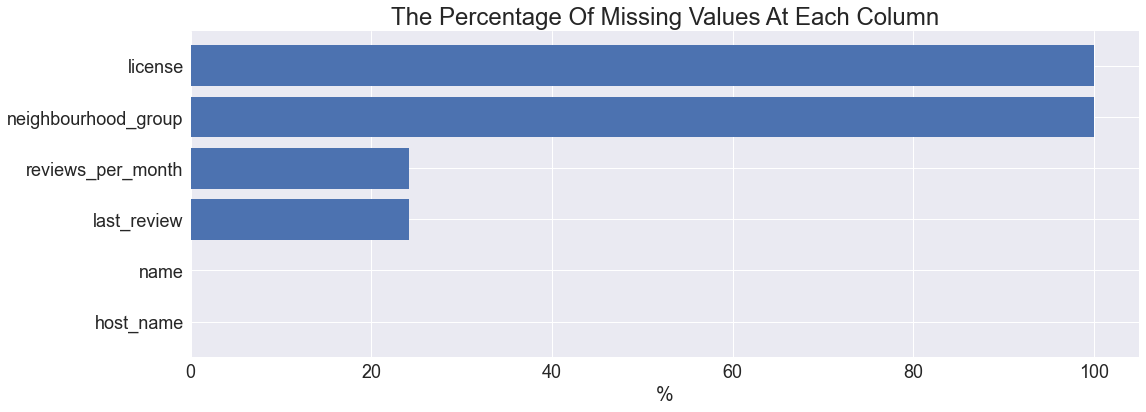

In [10]:
fig = plt.figure(figsize=(17, 6))
plt.rc('ytick', labelsize=18) # the plt.rc is above the plotting so the plots are plotted in the desired font 
plt.rc('xtick', labelsize=18) 
plt.barh(nulls['column_name'], nulls['null_percentage'])
plt.title('the percentage of missing values at each column'.title(), fontsize=24)
plt.xlabel('%', fontsize=20)

plt.show()

note that because the missing values of both (name, host_name) are less than 0.03 they can't be seen on the graph


 since both (license and neighbourhood_group) are totally consists of missing values so we will drop them 


In [11]:
df_no_null = df.drop(columns=['license', 'neighbourhood_group'])


and since the missing value percentage of  <br>
last_review = 24.16<br>
reviews_per_month = 24.16 <br>
we will drop those columns too

In [12]:
df_no_null = df_no_null.drop(columns=['last_review', 'reviews_per_month'])

now we will get the percentage of the missing values in both (host_name, name)


In [13]:
print(f'the percentage of the records with missing values now : {round(df_no_null.isnull().sum().sum() / rows_number, 6)}%')

the percentage of the records with missing values now : 0.000375%


and since the records with missing values counts for less than 0.001% of our data set we are going to simply drop only the records that are missing


In [14]:
df_no_null = df_no_null.dropna()

In [15]:
print(f'the number of missing values in the dataset now: {df_no_null.isnull().sum().sum()}')

the number of missing values in the dataset now: 0


we have dealt with the missing values in our df now we will deal with the redundant columns  


#### 2. dropping the redundant columns



In [16]:
df_no_null.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

In [17]:
df_no_null = df_no_null.drop(columns=['name', 'host_id', 'host_name', 'number_of_reviews'
                                      , 'calculated_host_listings_count', 'number_of_reviews_ltm'])
df_no_null.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'availability_365'],
      dtype='object')

we have dealt with redundant columns in our df now we will deal with the duplicated records <br>
we left the ID column because we will need it in joining process below

#### 3. dealing with duplicated entries 

In [18]:
print(f'the percentage of duplicated entries in our data = {round((df_no_null.duplicated().sum() / rows_number) *100, 2)}%')

the percentage of duplicated entries in our data = 0.0%


Since there is no duplicates we are going to move to step number 3


#### 4. put the data in the right type 

In [19]:
df_no_null.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,106332,Tower Hamlets,51.52874,-0.05396,Private room,55,3,74
1,13913,Islington,51.56861,-0.11270,Private room,50,1,343
2,284532,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,222
3,107048,Islington,51.52478,-0.10484,Private room,180,4,236
4,284603,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,180


In [20]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69325 entries, 0 to 69350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                69325 non-null  int64  
 1   neighbourhood     69325 non-null  object 
 2   latitude          69325 non-null  float64
 3   longitude         69325 non-null  float64
 4   room_type         69325 non-null  object 
 5   price             69325 non-null  int64  
 6   minimum_nights    69325 non-null  int64  
 7   availability_365  69325 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 4.8+ MB


In [21]:
cond = df_no_null.dtypes == 'object'
df_no_null.dtypes[cond].index

Index(['neighbourhood', 'room_type'], dtype='object')

In [22]:
cond = df_no_null.dtypes != 'object'
df_no_null.dtypes[cond].index

Index(['id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'availability_365'],
      dtype='object')

since all the columns are in the right type no conversion or casting is needed now we will check each column for anomaly (miss_spelled
word - or wrong value - typos)

#### 5. check for the data ranges

In [23]:
cat_col = df_no_null.dtypes[df_no_null.dtypes == 'object'].index
for col in cat_col:
    nunique = df_no_null[col].nunique()
    print(f'number of unique items in {col}: {nunique}')
    if nunique < 1000:
        for i, name in enumerate(sorted(df_no_null[col].unique())):
            if i < 10: print(f' {i} --- {name}')
            else: print(f'{i} --- {name}')

number of unique items in neighbourhood: 33
 0 --- Barking and Dagenham
 1 --- Barnet
 2 --- Bexley
 3 --- Brent
 4 --- Bromley
 5 --- Camden
 6 --- City of London
 7 --- Croydon
 8 --- Ealing
 9 --- Enfield
10 --- Greenwich
11 --- Hackney
12 --- Hammersmith and Fulham
13 --- Haringey
14 --- Harrow
15 --- Havering
16 --- Hillingdon
17 --- Hounslow
18 --- Islington
19 --- Kensington and Chelsea
20 --- Kingston upon Thames
21 --- Lambeth
22 --- Lewisham
23 --- Merton
24 --- Newham
25 --- Redbridge
26 --- Richmond upon Thames
27 --- Southwark
28 --- Sutton
29 --- Tower Hamlets
30 --- Waltham Forest
31 --- Wandsworth
32 --- Westminster
number of unique items in room_type: 4
 0 --- Entire home/apt
 1 --- Hotel room
 2 --- Private room
 3 --- Shared room


here only neighbourhood & room_type had unique values that are less than 1000 so we could spot if there 
are any misspelt letters and there ware not 
* now we will check the numerical values for errors


In [24]:
cond = (df_no_null.dtypes == 'int64') | (df_no_null.dtypes == 'float64')
num_val = df_no_null.dtypes[cond].index
num_val

Index(['id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'availability_365'],
      dtype='object')

here are the constrains for the above columns (available ranges)
1. no negative values are possible for all of the above columns 
2. the latitude col values must be from -90 to +90
3. the longitude col must be from -180 to 180 
4. the availability_365 must be from 0 to 360

In [25]:
deffect_df = pd.DataFrame()
for col in num_val:
    if col == 'latitude': #getting recs that breaks the range of latitude to inspect them 
        cond_1 =  ~((df_no_null[col] >= -90) & (df_no_null[col] <= 90))
        
    elif col == 'longitude':#getting recs that breaks the range of longitude to inspect them 
        cond_1 = ~((df_no_null[col] >= -180) & (df_no_null[col] <= 180))
        
    elif col == 'availability_365':#getting recs that breaks the range of availability_365 to inspectate them 
        cond_1 = ~(( df_no_null[col] >= 0) & (df_no_null[col] <= 365))
        
    else:
        # to get the negative values of all the cols that are not in the above condition
        cond_1 = df_no_null[col] < 0
    

    deffect_df = pd.concat([df_no_null[cond_1], deffect_df], axis= 0)
    
deffect_df = deffect_df.drop_duplicates()
print(f'the number of records of the deffect data frame is: {deffect_df.shape[0]}')


the number of records of the deffect data frame is: 0


since the deffect_df is an empty data frame so all numerical values are in the right ranges


#### 6. check for outliers 

by default, outliers should be based upon the entire dataset ... but on this specific dataset I think it must be based on each neighbourhood and I will show why.<br>
first i will get the average price for unite at each city

In [26]:
neig_avg = pd.DataFrame(df_no_null.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=0)).rename(columns= {'price': 'AVG_price'})
neig_avg


,AVG_price
neighbourhood,
Kensington and Chelsea,302.882047
Westminster,297.077458
City of London,269.063679
Hammersmith and Fulham,211.031386
Brent,206.438104
Kingston upon Thames,198.673235
Southwark,195.368129
Camden,193.788948
Wandsworth,176.366254


In [27]:
print(f'the percentage of neighbourhood with average less than 250$:    {round(len(neig_avg[neig_avg.values< 250]) / len(neig_avg)* 100, 2)}%')

print(f'the percentage of neighbourhood with average greater than 250$: {round(len(neig_avg[neig_avg.values> 250]) / len(neig_avg)* 100, 2)}%')

the percentage of neighbourhood with average less than 250$:    90.91%
the percentage of neighbourhood with average greater than 250$: 9.09%


we can get the outliers of both price and minimum_nights across the whole dataset ... but it seems more convenient to get them for each neighbourhood...  and by the numbers, we can see that the vast majority of neighbourhoods are below 250 so the overall median will be reduced due to that fact and the others above 250 will have so many outliers according to the reduced median but they are actually not outliers  

for testing that we are going to spectate  one neighbourhood with an average > 250 (Westminster neighbourhood) and see the number of outliers it contains if the outlier range was based on itself and if it was based on the whole dataset  

In [28]:

grp_df = df_no_null.groupby(['neighbourhood'])

# the original records number
whole = grp_df.get_group("Westminster").shape[0]
print(f'the original number of records in Westminster: {whole}')

# compared to itself
westminster_data = grp_df.get_group('Westminster')
q3, q1 = np.percentile(westminster_data['price'], [75, 25])
IQR = q3 - q1
cond_self = (westminster_data['price'] >= q1- 1.5*IQR) & (westminster_data['price'] <= q3+ 1.5*IQR)
num_1 = westminster_data[cond_self].shape[0]
print(f'number of outliers if the range was based only on the neighbourhood itself: {whole - num_1} --> {round((whole - num_1)/whole, 2)}%')
      
      
# compared to the whole data set
q3, q1 = np.percentile(df_no_null['price'], [75, 25])
IQR = q3 - q1
cond_self = (df_no_null['neighbourhood'] == 'Westminster') & (df_no_null['price'] >= q1- 1.5*IQR) & (df_no_null['price'] <= q3+ 1.5*IQR) 
num_2 = df_no_null[cond_self].shape[0]
print(f'number of outliers if range was based on the whole dataset: {whole - num_2} --> {round((whole - num_2)/whole, 2)}%')

the original number of records in Westminster: 7759
number of outliers if the range was based only on the neighbourhood itself: 615 --> 0.08%
number of outliers if range was based on the whole dataset: 1628 --> 0.21%


as we can see ... my hypothesis was true and due to many neighbourhoods below 250 Dollars many records from the cities with an average higher than 250 Dollars will be considered as outliers ... so in the analysis, we will get the outliers based on the neighbourhood itself 

##### 1. check for outliers in the price column

In [29]:
normalized_df = pd.DataFrame()

for neigh in df_no_null['neighbourhood'].unique(): # getting IQR of each neighbourhood
    q3, q1 = np.percentile(grp_df.get_group(neigh)['price'], [75, 25])
    IQR = q3 - q1
    cond = (df_no_null['neighbourhood'] == neigh) &(df_no_null['price'] >= q1 - 1.5* IQR) & (
            df_no_null['price'] <= q3 + 1.5* IQR) 
    normalized_df = pd.concat([normalized_df, df_no_null[cond]], axis=0)

normalized_df.head()


,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,106332,Tower Hamlets,51.52874,-0.05396,Private room,55,3,74
2,284532,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,222
53,301631,Tower Hamlets,51.51806,-0.01719,Private room,55,30,365
73,170702,Tower Hamlets,51.49686,-0.02627,Private room,60,3,0
96,62747,Tower Hamlets,51.52315,-0.05755,Private room,43,2,0


In [30]:
print(f'the percentage of outlieres in price: {round((df_no_null.shape[0] - normalized_df.shape[0]) / df_no_null.shape[0] * 100, 2)}%')

the percentage of outlieres in price: 7.11%


here as we see there is a 7.11% of records which are outliers ... these records need further investigation to know why are there so many outliers ... because the outlier percentage should not pass 2% of the whole data ... but after research, I have found that this high percentage is due to that there are so many units with very high prices in very expensive areas and this part will be further analysed in the analysis part 


now we will normalize (cap out) the outlier and present the data before eliminating the outliers and after

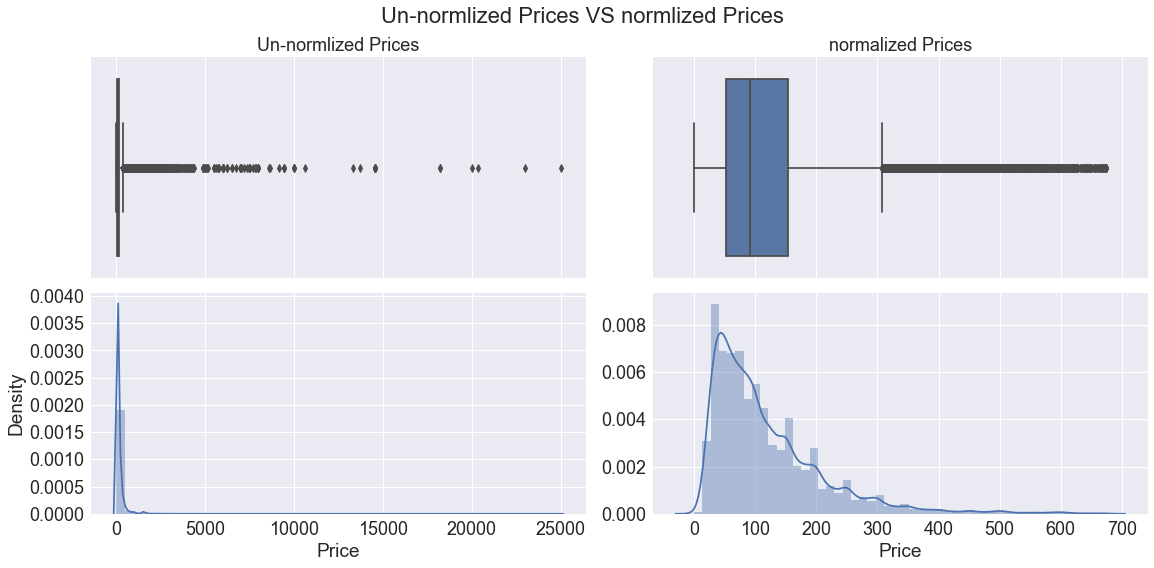

In [31]:
fig, axes= plt.subplots(2, 2, figsize= (16, 8), sharex='col')
fig.suptitle('Un-normlized Prices VS normlized Prices', fontsize=22)

plt.rc('ytick', labelsize=12) # the plt.rc is above the plotting so the plots are plotted in the desired font 
plt.rc('xtick', labelsize=12) 

sns.boxplot(df_no_null['price'], ax= axes[0][0])
axes[0][0].set_title('Un-normlized Prices', fontsize=18)
axes[0][0].set(xlabel='')


sns.boxplot(normalized_df['price'], ax = axes[0][1])
axes[0][1].set_title('normalized Prices', fontsize=18)
axes[0][1].set(xlabel='')

sns.distplot(df_no_null['price'], ax= axes[1][0])
axes[1][0].set_ylabel('Density', fontsize=19)
axes[1][0].set_xlabel('Price', fontsize=19)


sns.distplot(normalized_df['price'], ax=axes[1][1])
axes[1][1].set(ylabel='')
axes[1][1].set_xlabel('Price', fontsize=19)

plt.tight_layout()
plt.show()

in the above boxplot of normalized prices, it appears that there are so many outliers but actually they are not ... as described above it's just the avg of the whole data set below the outlier range so the data seems to be an outlier but they are just records from wealthy neibourhoods 

##### 2. check for outliers in minimum_nights column

In [32]:
normalized_df2 = pd.DataFrame()

for neigh in df_no_null['neighbourhood'].unique(): # getting IQR of each neighbourhood
    q3, q1 = np.percentile(grp_df.get_group(neigh)['minimum_nights'], [75, 25])
    IQR = q3 - q1
    cond = (df_no_null['neighbourhood'] == neigh) &(df_no_null['minimum_nights'] >= q1 - 1.5* IQR) & (
            df_no_null['minimum_nights'] <= q3 + 1.5* IQR) 
    normalized_df2 = pd.concat([normalized_df2, df_no_null[cond]])

normalized_df2.head()


,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,106332,Tower Hamlets,51.52874,-0.05396,Private room,55,3,74
2,284532,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,222
73,170702,Tower Hamlets,51.49686,-0.02627,Private room,60,3,0
96,62747,Tower Hamlets,51.52315,-0.05755,Private room,43,2,0
102,62970,Tower Hamlets,51.52435,-0.06938,Entire home/apt,380,1,68


In [33]:
print(f'the percentage of outlieres in price: {round((df_no_null.shape[0] - normalized_df2.shape[0]) / df_no_null.shape[0] * 100, 2)}%')

the percentage of outlieres in price: 8.93%


here as we see there is a 8.93% of records which are outliers 

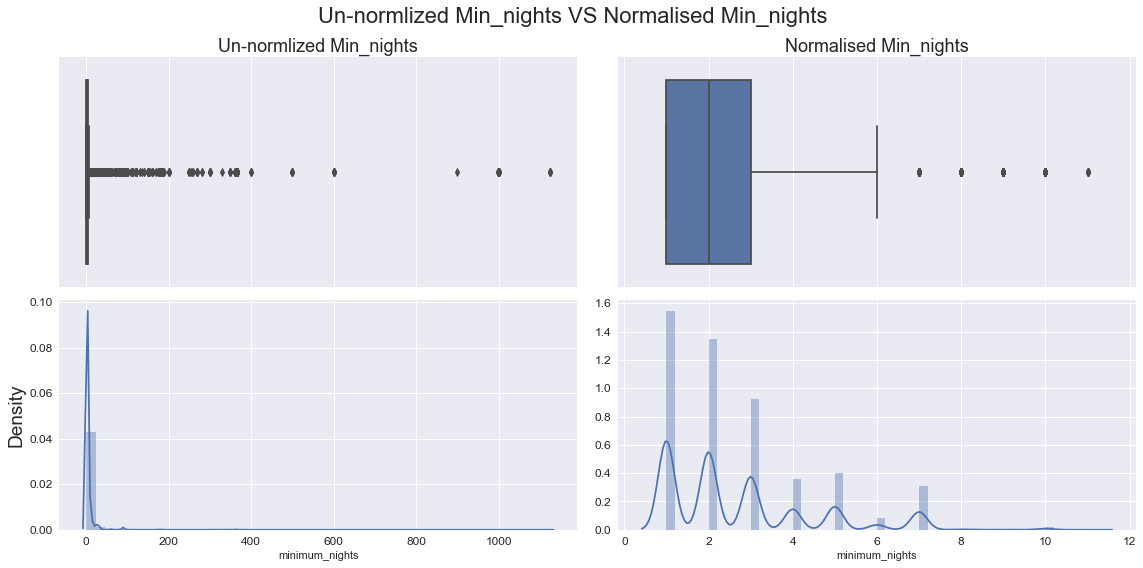

In [34]:
fig, axes= plt.subplots(2, 2, figsize= (16, 8), sharex='col')
fig.suptitle('Un-normlized Min_nights VS Normalised Min_nights', fontsize=22)

sns.boxplot(df_no_null['minimum_nights'], ax= axes[0][0])
axes[0][0].set_title('Un-normlized Min_nights', fontsize=18)
axes[0][0].set(xlabel='')


sns.boxplot(normalized_df2['minimum_nights'], ax = axes[0][1])
axes[0][1].set_title('Normalised Min_nights', fontsize=18)
axes[0][1].set(xlabel='')

sns.distplot(df_no_null['minimum_nights'], ax= axes[1][0])
axes[1][0].set_ylabel('Density', fontsize=19)

sns.distplot(normalized_df2['minimum_nights'], ax=axes[1][1])
axes[1][1].set(ylabel='')

plt.tight_layout()
plt.show()


##### adding the 2 normalized data frames to one big data frame and removing the duplicates

now we will add the df that contains no outliers in the price column to the other one that contains no outliers in the min_nights column and will merge them together and remove the duplicates

In [35]:
# note that the id is the unique identifier of each row that is why we didnot drop it before 

indx = pd.merge(left=normalized_df['id'], right= normalized_df2['id'], on='id', how='inner')
        # for more effeiciency on calculating time in the above we did the inner join only on the id column  
normalized_all = normalized_df.set_index('id').loc[indx['id'], :].reset_index()
        # then we make id to be the index of the normalized_df and get the records of the deired id only and then reset it
normalized_all.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,106332,Tower Hamlets,51.52874,-0.05396,Private room,55,3,74
1,284532,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,222
2,170702,Tower Hamlets,51.49686,-0.02627,Private room,60,3,0
3,62747,Tower Hamlets,51.52315,-0.05755,Private room,43,2,0
4,81449,Tower Hamlets,51.51061,-0.06646,Entire home/apt,156,2,196


In [36]:
normalized_all.duplicated().sum()

0

and now after using the ID column to identify the unique records and drop the duplicates ... now we will drop it 

In [37]:
normalized_all = normalized_all.drop(columns= ['id'])
normalized_all.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Tower Hamlets,51.52874,-0.05396,Private room,55,3,74
1,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,222
2,Tower Hamlets,51.49686,-0.02627,Private room,60,3,0
3,Tower Hamlets,51.52315,-0.05755,Private room,43,2,0
4,Tower Hamlets,51.51061,-0.06646,Entire home/apt,156,2,196


## 6. feature engineering and data frame creation


this phase will consist of two steps 

### 1.creating new featuers (columns) in the preprocessed data frame

here we will add a 
1. new column to define the wealth of the neibourhood
2. new column to define the usage level of the unit (365 - availability level)

In [38]:
normalized_all['wealth'] = np.where(normalized_all['price'].median() <= normalized_all['price'], 'wealthy', 'poor')
normalized_all.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,wealth
0,Tower Hamlets,51.52874,-0.05396,Private room,55,3,74,poor
1,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,222,wealthy
2,Tower Hamlets,51.49686,-0.02627,Private room,60,3,0,poor
3,Tower Hamlets,51.52315,-0.05755,Private room,43,2,0,poor
4,Tower Hamlets,51.51061,-0.06646,Entire home/apt,156,2,196,wealthy


In [39]:
normalized_all['usage_365'] = 365 - normalized_all['availability_365']
normalized_all.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,wealth,usage_365
0,Tower Hamlets,51.52874,-0.05396,Private room,55,3,74,poor,291
1,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,222,wealthy,143
2,Tower Hamlets,51.49686,-0.02627,Private room,60,3,0,poor,365
3,Tower Hamlets,51.52315,-0.05755,Private room,43,2,0,poor,365
4,Tower Hamlets,51.51061,-0.06646,Entire home/apt,156,2,196,wealthy,169


### 2.creating a new data frame consists of the data of each neighbourhood aggregated


from scoping through the data we find that to answer the question of how to increase the usage of Airbnb and what areas needs enhancement and what type of enhancments needed there is 5 important featuers we must have in a new dataframe

##### 1. [mean price & number of units used] for each neighbourhood


In [40]:
nb_group = normalized_all.groupby('neighbourhood')
mean_count = nb_group['price'].agg(['mean', 'count'])
mean_count = mean_count.rename(columns= {'mean': 'unit_mean_price', 'count': 'units_used'})
mean_count.head()

,unit_mean_price,units_used
neighbourhood,,
Barking and Dagenham,80.481793,357
Barnet,94.546784,1368
Bexley,73.119318,352
Brent,100.812825,1731
Bromley,78.305155,485


and in the below graph we will show mean for each country

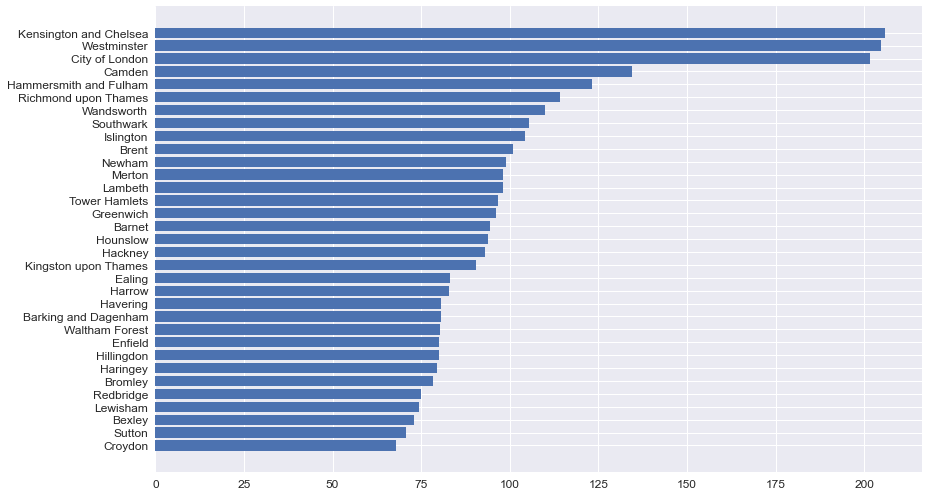

In [41]:
sorted_mean = mean_count['unit_mean_price'].sort_values()
plt.figure(figsize=(13, 7))
plt.barh(sorted_mean.index, sorted_mean.values)
plt.tight_layout()
plt.show()

#####  2.category for every group of neibourhoods with the same mean_price range

In [42]:
mean_count['category'] = mean_count['unit_mean_price'].apply(create_category)
mean_count = mean_count.dropna() # cause the neighbourhood out of the range will have NAN as a category
mean_count.head()

,unit_mean_price,units_used,category
neighbourhood,,,
Barking and Dagenham,80.481793,357,[75: 100]
Barnet,94.546784,1368,[75: 100]
Bexley,73.119318,352,[50: 75]
Brent,100.812825,1731,[100: 125]
Bromley,78.305155,485,[75: 100]


##### 3.the mean usage level for units at each neighbourhood

In [43]:
usage_means = nb_group['usage_365'].agg(['mean'])
usage_means = usage_means.rename(columns= {'mean': 'usage_365_mean'})
usage_means.head()

,usage_365_mean
neighbourhood,
Barking and Dagenham,192.742297
Barnet,229.372807
Bexley,172.053977
Brent,248.589832
Bromley,225.443299


##### 4.the location of each neighbourhood as (longtude and latitude)

now we will get the longtude and the latitude of every neighbourhood from the mean long and lat for each neibourhood .. because the long and lat giving are for the units not for the neighbourhood ... so we can get them manually online or having them from the data by getting the mean of them 


In [44]:
lon_lat_df = nb_group.agg({'longitude': 'mean', 'latitude': 'mean'})
lon_lat_df.head()

,longitude,latitude
neighbourhood,,
Barking and Dagenham,0.118488,51.543603
Barnet,-0.207677,51.599211
Bexley,0.154432,51.468647
Brent,-0.239094,51.547681
Bromley,0.006850,51.396944


##### 5.putting all of them in the new df

In [45]:
neighbourhood_df = pd.concat([mean_count, usage_means, lon_lat_df, nb_group['availability_365'].agg('mean')], axis=1)
neighbourhood_df.head()

,unit_mean_price,units_used,category,usage_365_mean,longitude,latitude,availability_365
neighbourhood,,,,,,,
Barking and Dagenham,80.481793,357,[75: 100],192.742297,0.118488,51.543603,172.257703
Barnet,94.546784,1368,[75: 100],229.372807,-0.207677,51.599211,135.627193
Bexley,73.119318,352,[50: 75],172.053977,0.154432,51.468647,192.946023
Brent,100.812825,1731,[100: 125],248.589832,-0.239094,51.547681,116.410168
Bromley,78.305155,485,[75: 100],225.443299,0.006850,51.396944,139.556701


## 7. data exploration and visualization phase


### part 1: creating a heat map to see the correlation between the features


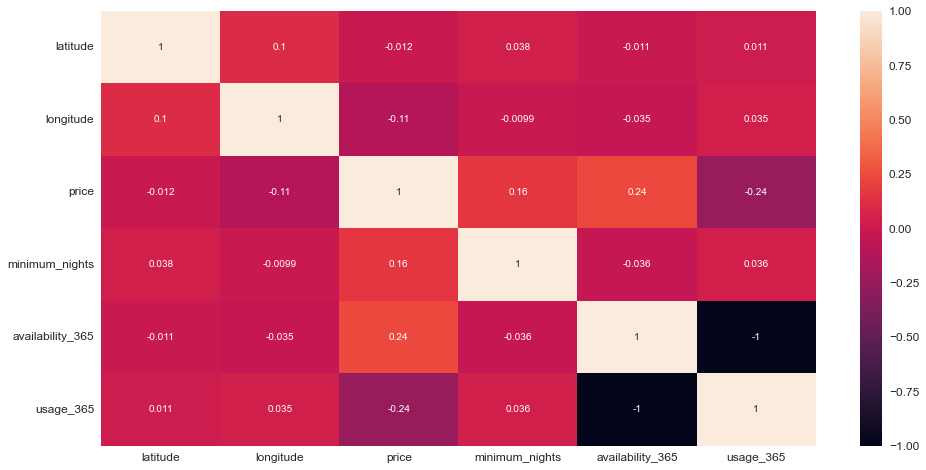

In [46]:
corr = normalized_all.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True)
plt.show()


### part 2: what is the most preferable room type


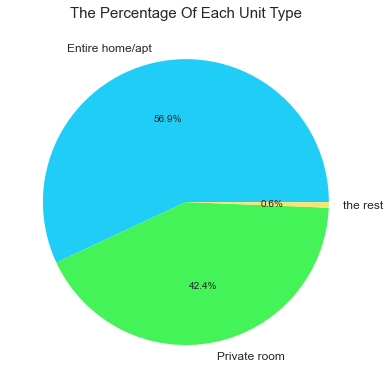

In [47]:
room_types = normalized_all['room_type'].value_counts(ascending=False)
# colors = ['#20CDF7', '#43F357', '#F4E473', '#F5EEC4']
enitr_home = '#20CDF7'
pri_room = '#43F357'
the_rest = '#F4E473'

plt.rc('ytick', labelsize=12) 
plt.rc('xtick', labelsize=12) 

labels = list(room_types.index[:2]) + ['the rest']

plt.pie(room_types.values[:-1] / sum(room_types), labels= labels, autopct='%1.1f%%',
         colors= [enitr_home, pri_room, the_rest])
plt.title('the percentage of each unit type'.title(), fontsize=15)

plt.tight_layout()
plt.show()


here we see that the entire home is the most type of room was reserved but <br>
we need to make sure that this is absolute and not due to the wealth level of the user

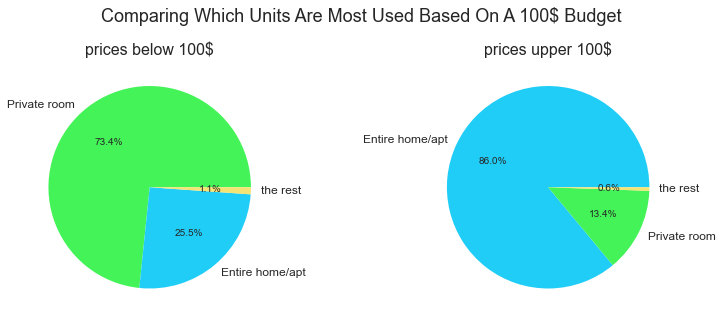

In [48]:
room_based_wealth = normalized_all.groupby('wealth')['room_type'].value_counts(ascending=False)
fig = plt.figure(figsize=(11, 4.5))
fig.suptitle('comparing which units are most used based on a 100$ budget'.title(), fontsize=18)
ax1, ax2= fig.subplots(1, 2)

labels_pie1 = list(room_based_wealth['poor'].index[:2]) + ['the rest']
ax1.pie(room_based_wealth['poor'][:-1], labels= labels_pie1,
        autopct='%1.1f%%', colors= [pri_room, enitr_home, the_rest])
ax1.set_title('prices below 100$', fontsize=16)

# wealthy
labels_pie2 = list(room_based_wealth['wealthy'].index[:2]) + ['the rest']
ax2.pie(room_based_wealth['wealthy'][:-1], labels= labels_pie2,
        autopct='%1.1f%%', colors= [enitr_home, pri_room, the_rest])

ax2.set_title('prices upper 100$', fontsize=16)

fig.tight_layout()
fig.subplots_adjust(wspace=0.15)
plt.show()

in the above graph it's shown that above 100$ budget people tend to use an Entire home but below that people tend to use private rooms ... and to confirm this by other factors we will present the median of each room type


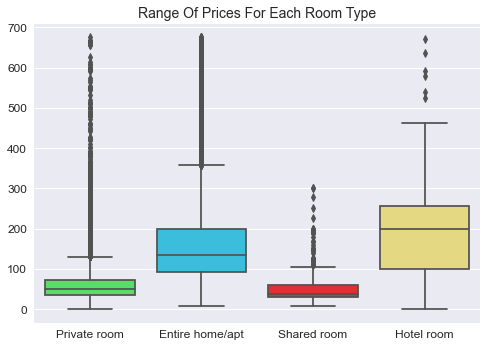

In [49]:
my_pal = {"Private room": pri_room, "Entire home/apt": enitr_home, "Hotel room":the_rest,
          "Shared room": "#ff1212"}
sns.boxplot(data= normalized_df, x= 'room_type', y= 'price', palette=my_pal)
plt.title('range of prices for each room type'.title(), fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

here we can see that our hypothesis is confirmed cause on average private room cost 50$ while the entire home causes 150 <br>
and from this, we can conclude that 
1. people with low budget tends to have private rooms 
2. people with high budgets tend to have entire homes/apt


but to check our hypothesis even more we will focus on the units below the 100$ budget and see 
1. was the entire home outnumbered by private rooms in this budget so it seems people tend more towards the private room 
2. if so how to confirm the hypothesis 

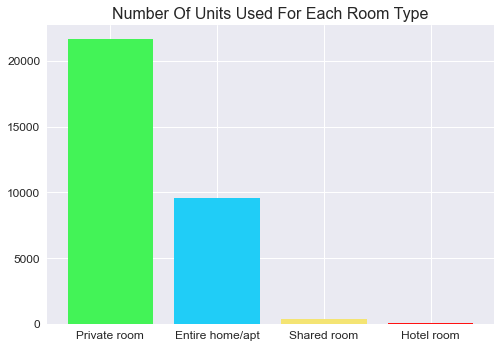

In [50]:
cond = normalized_all['price'] < 100
grp_df = normalized_all[cond].groupby(['room_type'])
rooms_count = grp_df['price'].count().sort_values(ascending=False)
plt.bar(rooms_count.index, rooms_count, color=[pri_room, enitr_home, the_rest, '#ff1212'])
plt.title('number of units used for each room type'.title(), fontsize=16)
plt.show()

as we can see from the above graph ... entire home was outnumbered so to check our hypothesis we will take the usage percentage of the units during the year as our KPI<br>


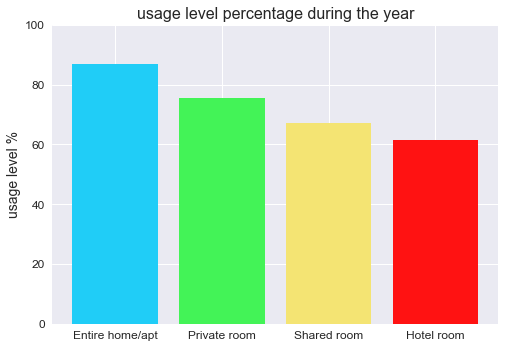

In [51]:
usage_lvl = (grp_df['usage_365'].mean()/ 365 * 100).sort_values(ascending=False) # we divide to get a percentage
plt.bar(usage_lvl.index, usage_lvl, color= [enitr_home, pri_room, the_rest, '#ff1212'])
plt.title('usage level percentage during the year', fontsize=16)
plt.ylabel('usage level %', fontsize=14)
plt.axis(ymin= 0, ymax= 100)
plt.show()

since the type entire home has higher usage during the year it will indicate that Entire home is the most preferred type even in the low 100$ budget


### part 3: spotting the geographical trends 


now we will look at the geographical distribution of the data so we can spot any geographical trends
by exporting the data to Tableau or Power BI

In [53]:
neighbourhood_df.to_csv('neighbourhoods_data_aggrigated.csv')

and after using Tableau we get the drawing to jupyter


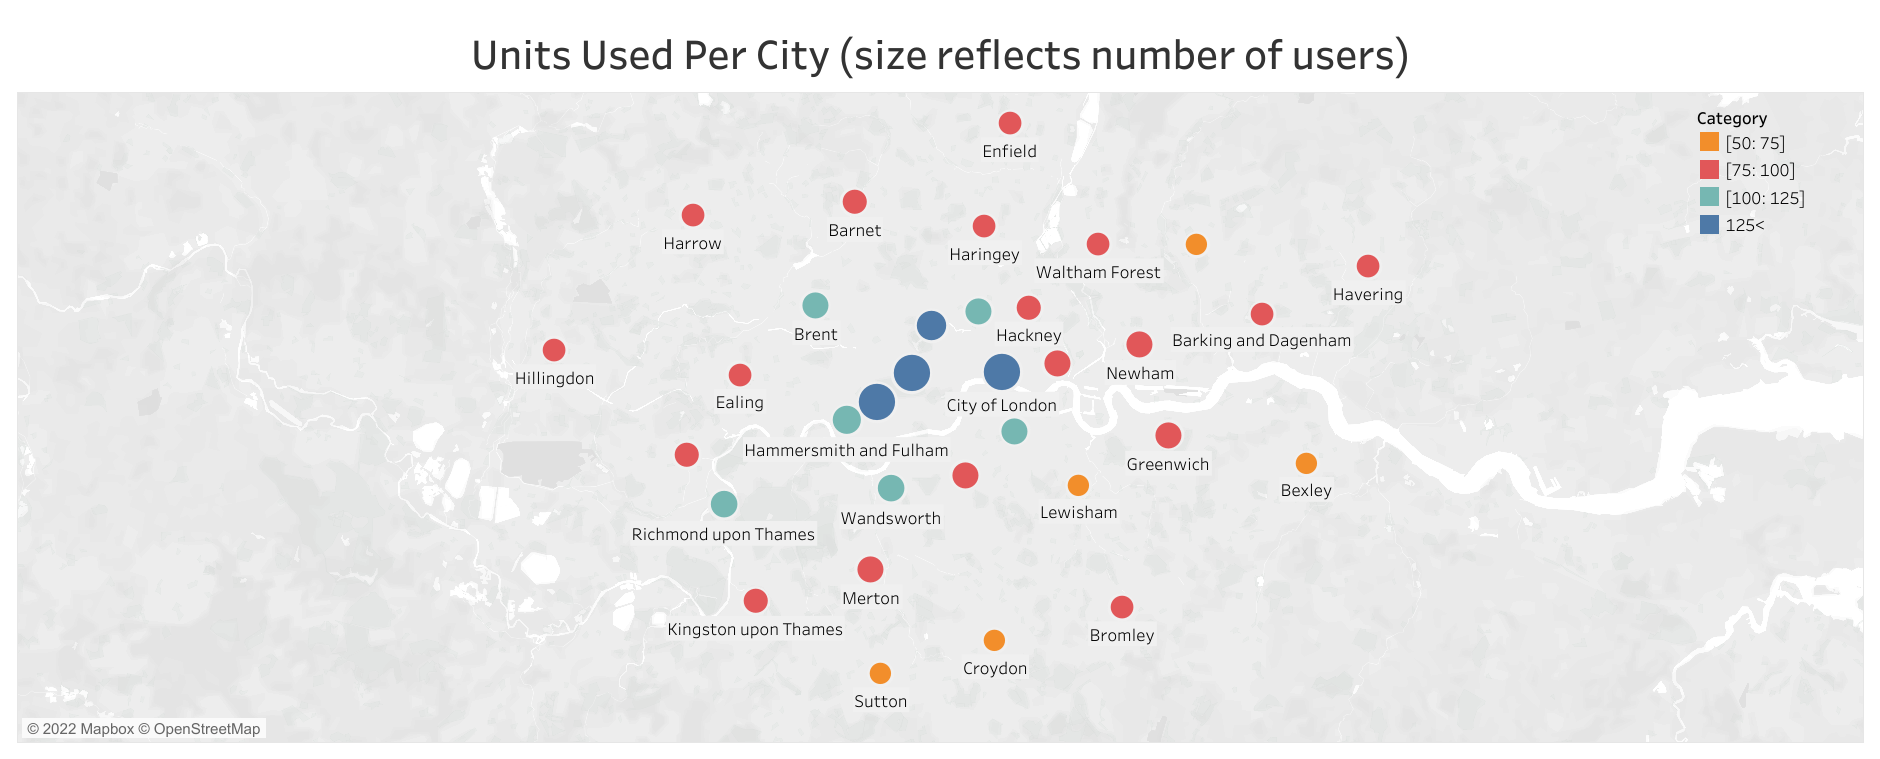

In [54]:
Image("C:/Users/Abdelghany_Aref/Downloads/Dashboard 1 (1).png")

here we can see that 
1. the more to the centre of London the more units are used 
2. the more to the centre of London the more the average price for the unit increases
to interact with the dynamic dash board click [here](https://public.tableau.com/app/profile/abdelghany.aref/viz/LondonAirbnb_16717547456530/Dashboard1) 

and to put things in contrast we will show a plot of neighbourhoods with the same average price in comparison 


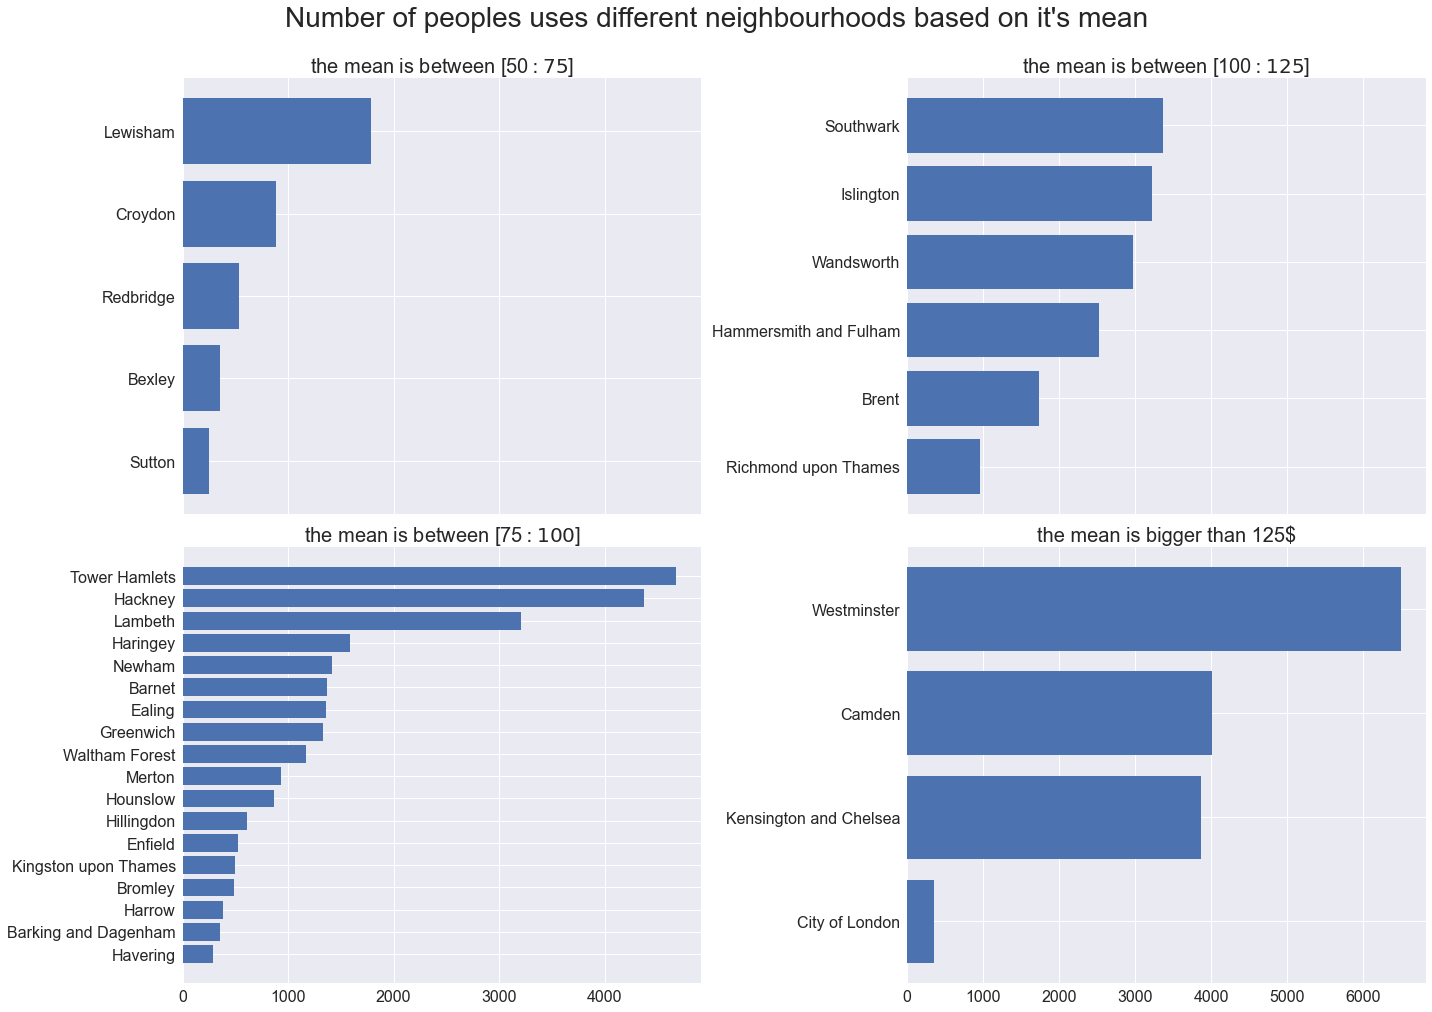

In [108]:
fig = plt.figure(figsize=(20, 14))
# plt.rc('xtick', labelsize=16)
# plt.rc('ytick', labelsize=16)

[[ax1, ax2], [ax3, ax4]] = fig.subplots(2, 2, sharex='col')

fig.suptitle("number of peoples uses different neighbourhoods based on it's mean".capitalize(),
             fontsize= 28, x=0.5, y=1.001)


df_50_75 = cond_(neighbourhood_df, 50)
plot_colored_bar(df_50_75, 'index', 'units_used', ax1,
                 title='the mean is between [50$ : 75$]', sort_=True)


df_75_100 = cond_(neighbourhood_df, 75)
plot_colored_bar(df_75_100, 'index', 'units_used', ax3,
               title= 'the mean is between [75$ : 100$]', sort_=True)
# availability_365

df_100_125 = cond_(neighbourhood_df, 100)
plot_colored_bar(df_100_125, 'index', 'units_used', ax2,
               title= 'the mean is between [100$ : 125$]', sort_=True)

df_125 = cond_(neighbourhood_df, 125)
plot_colored_bar(df_125, 'index', 'units_used', ax4,
               title= 'the mean is bigger than 125$', sort_=True)




plt.tight_layout()
plt.show()

### part 4: getting minimum night boundaries to make an offer for the customer that exceeds it


now we want to know the average minimum night for every room type and does it differ based on the neighbourhood


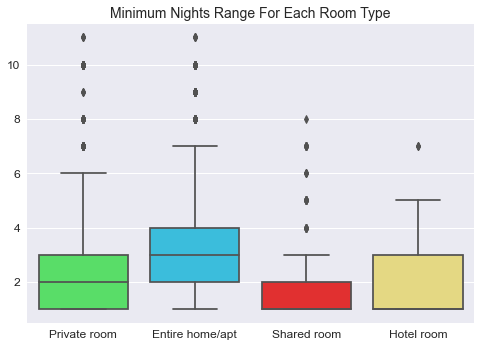

In [109]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
sns.boxplot(data= normalized_df2, x= 'room_type', y= 'minimum_nights', palette=my_pal)

plt.title('Minimum nights range for each room type'.title(), fontsize=14)
plt.ylabel('')
plt.xlabel('')
plt.show()

the above chart shows the average of minimum nights across the data set 
but to be more precise so we can target the neighbourhoods we will create a sub-data frame containing the exact number for each neighbourhood


In [110]:
whole = df.groupby(['neighbourhood', 'room_type'])['minimum_nights'].median()
whole

neighbourhood         room_type      
Barking and Dagenham  Entire home/apt    3.0
                      Private room       2.0
                      Shared room        1.0
Barnet                Entire home/apt    3.0
                      Hotel room         1.0
                                        ... 
Wandsworth            Shared room        1.0
Westminster           Entire home/apt    3.0
                      Hotel room         1.0
                      Private room       1.0
                      Shared room        1.0
Name: minimum_nights, Length: 117, dtype: float64

and from the above data frame, we now know the data of each neighbourhood and the average minimum nights for each type of room in each neighbourhood


### part 5: putting neighbourhoods with the same average price for a unit in a comparison


looking at different neighbourhoods with the same avg price usage level


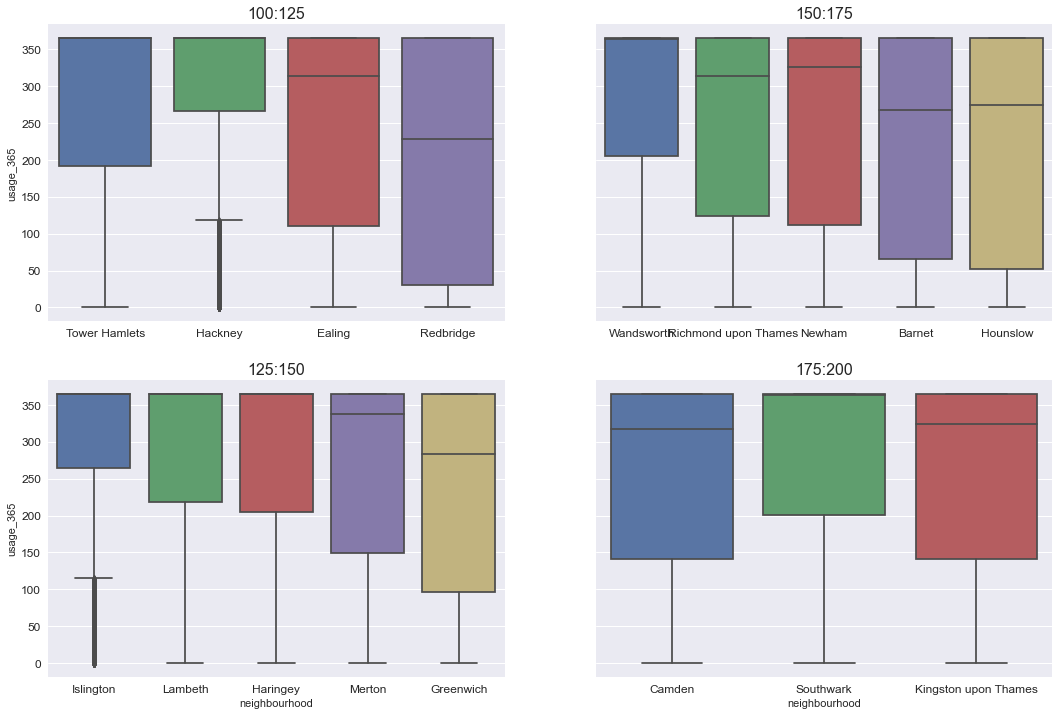

In [218]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(18, 12), sharey='row')
sns.boxplot(data= normalized_all[normalized_all['neighbourhood'].isin(df_100_125.index)]
            , x= 'neighbourhood', y= 'usage_365', ax=ax1)
ax1.set_title('100:125', fontsize= 16)
# ax1.set_ylabel()
ax1.set_xlabel('')


sns.boxplot(data= normalized_all[normalized_all['neighbourhood'].isin(df_125_150.index)]
            , x= 'neighbourhood', y= 'usage_365', ax=ax3)
ax3.set_title('125:150', fontsize= 16)
# ax1.set_ylabel()
# ax1.set_xlabel()

sns.boxplot(data= normalized_all[normalized_all['neighbourhood'].isin(df_150_175.index)]
            , x= 'neighbourhood', y= 'usage_365', ax=ax2)
ax2.set_title('150:175', fontsize= 16)
ax2.set_ylabel('')
ax2.set_xlabel('')

sns.boxplot(data= normalized_all[normalized_all['neighbourhood'].isin(df_175_200.index)]
            , x= 'neighbourhood', y= 'usage_365', ax=ax4)
ax4.set_title('175:200', fontsize= 16)
ax4.set_ylabel('')
# ax1.set_xlabel()
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

plt.show()

now we have the usage level range of each neighbourhood and this data is very useful when targeting the users of each neighbourhood


##  8. recommendations


1. having more units of type entier hoom with lower prices that compete with units of type private room will increase the usage of these units since people tend to use them even in with low budget <br><br>

2. targeting cities closer to the centre of London like (Covent Garden, Fitzrovia, Soho, Leicester Square, Mayfair)<br><br>

3. lower the prices of the cities that are further away from London like (barnet, Hounslow, Richmond, Kingston)<br><br>

4. in areas with high usage levels a marketing campaign should target the unit's owner, not the user to increase the number of units in these areas <br><br>
5. in areas with low usage levels a marketing campaign should target the user, not the unit owner to increase the usage levels of the units in these areas <br><br>

6. making discounts or offers for people in the less used areas to encourage them to book through Airbnb


## 9. KPIs that would make the analysis better and more reliable


1. a KPI for customer service should be added 
2. a KPI for rooms quality should be added 
3. a KPI for the review feedback should be added 
4. a survey should be initialised all over London asking people about the most preferable and most bad to be avoided 